In [1]:
import pandas as pd
import FinanceDataReader as fdr
# pypfopt pkg : is to optimize a PF of stocks.
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.cla import CLA
from pypfopt import plotting, risk_models, expected_returns
from pypfopt.plotting import plot_weights

In [39]:
pf = ['AAPL', 'TSLA', 'BRK-A']
prices = pd.DataFrame()
for ticker in pf:
    prices[ticker] = fdr.DataReader(ticker, '2012-03-05', '2022-03-05')['Adj Close']

In [40]:
# annualized mean return
mu = expected_returns.mean_historical_return(prices)

# sample_cov - calculate covariance by prices and returns annualized results, no need to multiply trading days(ex-252) - already included the trading days in the function
sigma = risk_models.sample_cov(prices)
mu, sigma

(AAPL     0.259366
 TSLA     0.620440
 BRK-A    0.151725
 dtype: float64,
            AAPL      TSLA     BRK-A
 AAPL   0.080842  0.052054  0.021694
 TSLA   0.052054  0.311551  0.023406
 BRK-A  0.021694  0.023406  0.031393)

In [67]:
# weight_bounds=(-1, 1) : including short position
# weight_bounds=(0, 1) : each asset can be 0~100% portion of total PF
efficient_frontier = EfficientFrontier(mu, sigma, weight_bounds=(0, 1))

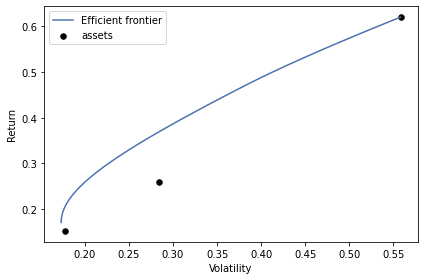

In [68]:
# to see plotting.plot_efficient_frontier, min_volatility or max_sharp shouldn't run,  and vise versa.
plotting.plot_efficient_frontier(efficient_frontier, show_assets=True)

In [63]:
# to minimize the volatility of PF
# min_vol_weights = efficient_frontier.min_volatility()
# print(f'Each portion of PF to minimize the PF volatility : {min_vol_weights}')

# to maximie risk-adjusted return
max_sharpe_ratio_weights  = efficient_frontier.max_sharpe(risk_free_rate=0.04)
print(f'Each portion of PF to maximize the PF sharp ratio: {max_sharpe_ratio_weights}')

Each portion of PF to maximize the PF sharp ratio: OrderedDict([('AAPL', 0.3042935504019789), ('TSLA', 0.3508034068687788), ('BRK-A', 0.3449030427292421)])


Expected annual return: 34.9%
Annual volatility: 26.6%
Sharpe Ratio: 1.16


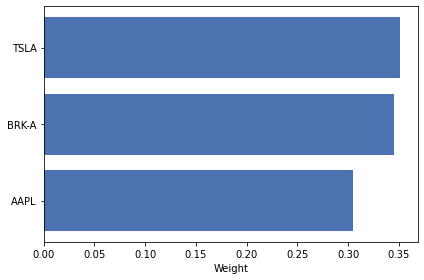

In [64]:
efficient_frontier.portfolio_performance(verbose=True, risk_free_rate=0.04)
plot_weights(max_sharpe_ratio_weights)

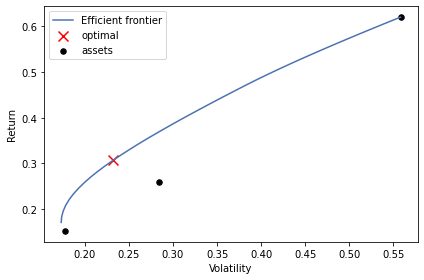

In [66]:
# CLA(Critical Line Algorithm): optimization solution to find the optimal PF on the curve
# only one algorithm specifically designed for inequality-constrained PF optimization
cla = CLA(mu, sigma)
plotting.plot_efficient_frontier(cla)